## t-SNE


In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

In [2]:
train=pd.read_csv('../1. Task and Data/train.csv',sep='|')
test=pd.read_csv('../1. Task and Data/test.csv',sep='|')

In [3]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


In [4]:
# for training set

train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']


# for test set

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [5]:
train.shape

(1879, 21)

In [6]:
train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,...,1.886207,0.000000,0.103448,0.006641,0.000000,0.002846,19.268739,0.127971,0.000000,0.054845
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,...,1.954286,0.142857,0.285714,0.046296,0.018519,0.037037,3.947368,0.182749,0.073099,0.146199
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,...,4.781538,0.769231,0.384615,0.001979,0.006596,0.003298,24.388674,0.048263,0.160875,0.080438
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,...,3.183103,0.137931,0.137931,0.004467,0.002233,0.002233,19.402015,0.086665,0.043332,0.043332
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,...,3.019630,0.259259,0.074074,0.006977,0.016279,0.004651,5.274132,0.036796,0.085858,0.024531


In [7]:
train.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349,...,7.067227,0.681185,0.358495,0.022530,0.020324,0.010429,153.435326,1.053188,0.825982,0.183389
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720,...,12.198532,1.205101,0.669294,0.132777,0.136699,0.063322,3477.973838,23.989756,18.910695,1.699509
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000,...,0.001111,0.000000,0.000000,0.000000,0.000000,0.000000,0.026406,0.000000,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000,...,1.680123,0.142857,0.066667,0.002585,0.002314,0.001102,9.318717,0.048948,0.042703,0.020189
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000,...,3.313000,0.333333,0.166667,0.005797,0.005263,0.002671,18.349359,0.105362,0.095724,0.050120
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000,...,6.532444,0.630682,0.333333,0.011554,0.010759,0.005329,35.988238,0.212756,0.192697,0.100218
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000,...,95.580000,10.000000,5.000000,3.000000,4.500000,2.000000,147300.000000,1000.000000,800.000000,66.666667


In [8]:
# Imputation of NaN and Infinity values
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

In [9]:
#Creating a third label for unlabeled data = 2
test["fraud"] = 2

In [10]:
test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,...,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,7.0,...,1.142857,0.571429,0.008565,0.017131,0.008565,5.278029,0.045208,0.090416,0.045208,2
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,27.0,...,0.222222,0.037037,0.006972,0.005976,0.000996,17.019834,0.118664,0.101712,0.016952,2
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,1.0,...,5.000000,4.000000,0.024691,0.030864,0.024691,11.571429,0.285714,0.357143,0.285714,2
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,14.0,...,0.214286,0.285714,0.016917,0.005639,0.007519,6.274325,0.106145,0.035382,0.047175,2
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,19.0,...,0.000000,0.000000,0.004494,0.000000,0.000000,21.110057,0.094877,0.000000,0.000000,2


In [11]:
test_sample = test.sample(frac=0.1, replace=True)

In [12]:
data = pd.concat([train, test_sample], ignore_index=True, sort=False)
#data = train

In [13]:
data.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,...,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro
count,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,...,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000,51691.000000
mean,3.501828,915.563599,49.872724,5.498114,4.989476,2.498907,0.070031,0.230648,0.725033,1.929311,...,6.587391,0.660632,0.332707,0.024564,0.022188,0.010781,105.783342,0.630419,0.532561,0.255004
std,1.705388,530.989124,28.858304,3.450113,3.176227,1.702596,0.575638,1.917122,1.283819,0.366568,...,11.370370,1.184016,0.613451,0.200288,0.183274,0.079357,1899.986795,12.013370,8.708764,3.889854
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010060,0.000000,0.000000,0.000000
25%,2.000000,453.000000,24.955000,2.000000,2.000000,1.000000,0.008698,0.027365,0.166667,2.000000,...,1.620851,0.142857,0.066667,0.002744,0.002410,0.001098,9.205362,0.049953,0.043754,0.020187
50%,4.000000,916.000000,49.700000,6.000000,5.000000,3.000000,0.016938,0.054572,0.357143,2.000000,...,3.218889,0.321429,0.166667,0.006012,0.005476,0.002725,18.324343,0.110193,0.100189,0.050050
75%,5.000000,1377.000000,74.830000,8.000000,8.000000,4.000000,0.034034,0.108632,0.692308,2.000000,...,6.250000,0.636364,0.333333,0.012000,0.011062,0.005488,36.543143,0.222564,0.201435,0.099602
max,6.000000,1831.000000,99.990000,11.000000,10.000000,5.000000,30.000000,99.400000,11.000000,2.000000,...,99.940000,10.000000,5.000000,11.000000,10.000000,5.000000,175900.000000,1100.000000,900.000000,400.000000


Attention: I only apply logscaling for the training set yet. Needs to be changed for overlaying both data sets

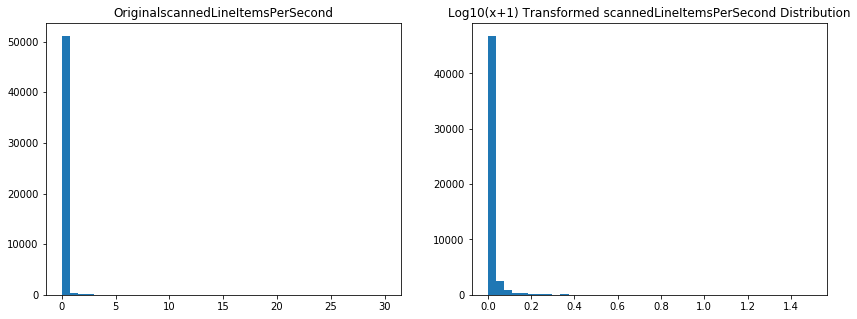

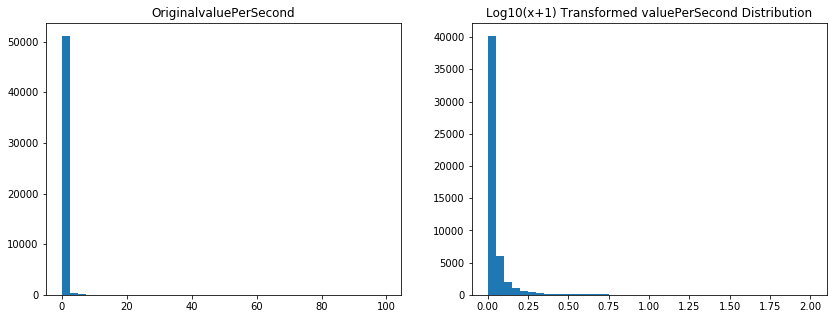

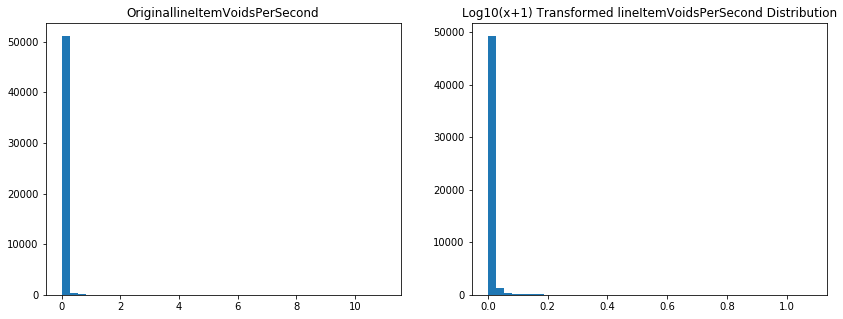

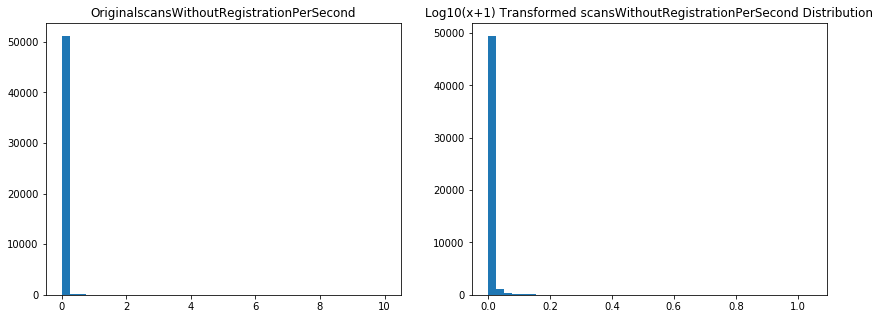

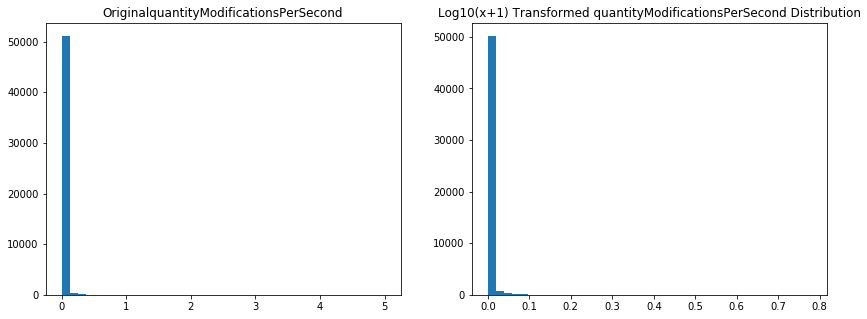

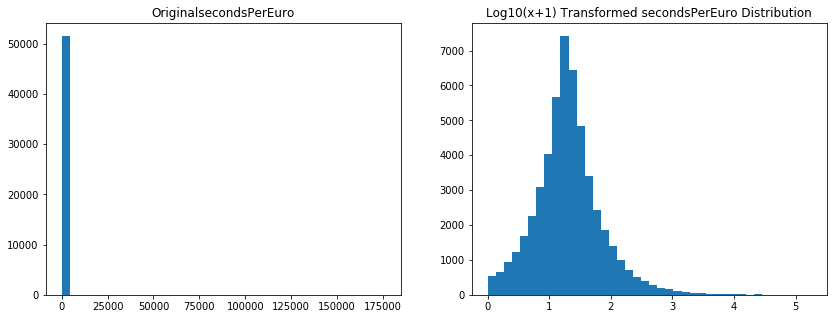

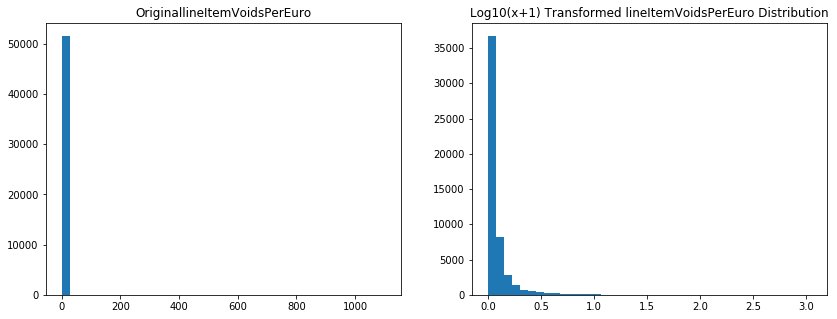

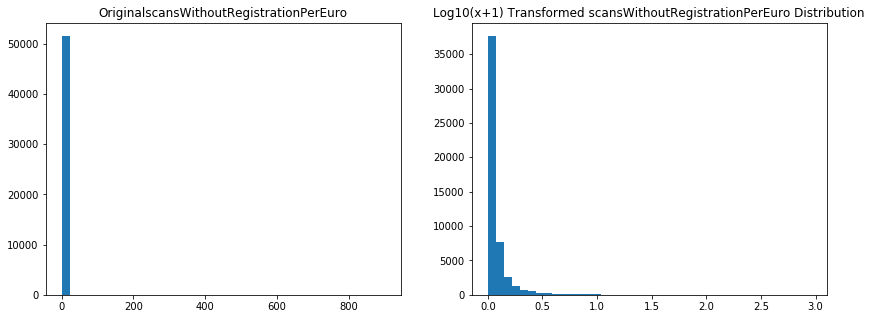

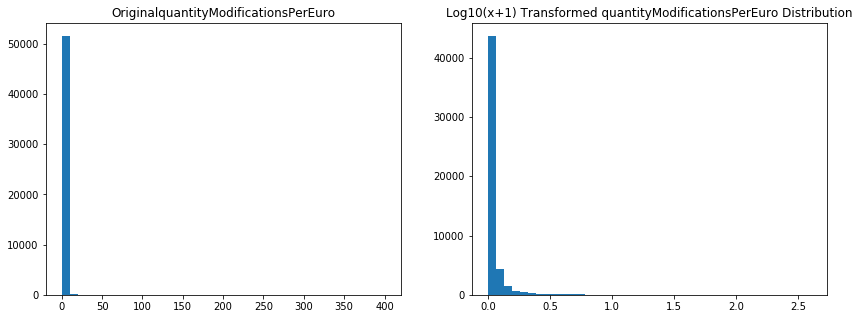

In [14]:
# Log transform amount values to give more normal distribution

LogFeatures = ['scannedLineItemsPerSecond','valuePerSecond','lineItemVoidsPerSecond','scansWithoutRegistrationPerSecond','quantityModificationsPerSecond',
'secondsPerEuro','lineItemVoidsPerEuro','scansWithoutRegistrationPerEuro','quantityModificationsPerEuro']

for i in LogFeatures:
    #Print original distribution
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.hist(data[i], bins=40)
    plt.title('Original' + i)

    #Print transformed distribution
    plt.subplot(1,2,2)
    d0 = np.log10( data[i].values + 1 )
    # d0 = np.log1p( data['Amount'].values ) / np.log(10)
    plt.hist( d0, bins=40 )
    plt.title('Log10(x+1) Transformed '  + i + ' Distribution')
    plt.show()
    
    #Replace with transformed data in dataset
    data[i] = d0

## UnderSampling the DataSet to apply t-SNE

### Approach:
### UnderSampling the data to nearly imbalanced and balanced datasets seperately to apply tsne.





### 1) Applied t-SNE to Nearly Balanced DataSet by UnderSampling under different parameters of t-SNE.



In [15]:
# underSampleRatio -> fraud/normal
def UnderSampleData(data,underSampleRatio):

    # Number of data points in the minority class
    fraudrecords = len(data[data.fraud == 1])
    fraudindices = np.array(data[data.fraud == 1].index)
    # Picking the indices of the normal classes
    normalindices = data[data.fraud == 0].index
    
    samples=(fraudrecords)/underSampleRatio
    
    randomnormalindices = np.random.choice(normalindices, int(samples), replace = False)
    randomnormalindices = np.array(randomnormalindices)

    # Appending the 2 indices
    undersampleindices = np.concatenate([fraudindices,randomnormalindices])

    # Under sample dataset
    undersampledata = data.iloc[undersampleindices,:]
    return undersampledata

In [16]:
def standardize(X):
    # Data-preprocessing: Standardizing the data
    from sklearn.preprocessing import StandardScaler
    standardized_data = StandardScaler().fit_transform(X)
    ## stddata - data which is standardized
    stddata = pd.DataFrame(standardized_data, columns = X.columns)
    return stddata

In [17]:
def TSNEModel(perplexity,iterations,sampledata):
    from sklearn.manifold import TSNE
    model = TSNE(n_components=2, random_state=0,perplexity=perplexity,n_iter=iterations)
    # save the labels into a variable y.
    y = sampledata['fraud']
    # Drop the label feature,store the  data in X.
    X = sampledata.drop("fraud",axis=1)
    # creating a new data frame which help us in ploting the result data
    tsne_data = model.fit_transform(X) 
    tsne_data = np.vstack((tsne_data.T, y)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    # Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    str="With perplexity = {0}, n_iter = {1}".format(perplexity, iterations)
    plt.title(str)   
    plt.show()

In [18]:
# Standardize the dataSet
# save the labels into a variable y.
y = data['fraud']
# Drop the label feature, standardize the data and store the  data in X.
X = standardize(data.drop("fraud",axis=1))
stddata = pd.concat([X, y], axis=1)


In [19]:
stddata.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,...,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,fraud
count,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,...,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,5.169100e+04,51691.000000
mean,1.811980e-15,-4.333845e-17,-1.128157e-16,1.543414e-17,-3.223880e-16,-4.445617e-16,-3.608316e-18,5.674077e-17,7.077884e-17,-7.714279e-17,...,-2.492618e-16,-7.340775e-17,2.133900e-17,1.613970e-16,4.829489e-16,-1.600159e-16,-5.312837e-16,3.738167e-16,-1.222746e-15,1.929311
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,0.366568
min,-1.467028e+00,-1.722394e+00,-1.728210e+00,-1.593619e+00,-1.570897e+00,-1.467718e+00,-3.202530e-01,-4.581163e-01,-5.647525e-01,-1.672472e+00,...,-5.579639e-01,-5.423574e-01,-2.395530e-01,-2.310438e-01,-2.022034e-01,-2.419799e+00,-5.505465e-01,-5.336654e-01,-4.190782e-01,0.000000
25%,-8.806456e-01,-8.711442e-01,-8.634591e-01,-1.013923e+00,-9.412126e-01,-8.803741e-01,-2.636368e-01,-3.551379e-01,-4.349302e-01,-8.635255e-01,...,-4.373080e-01,-4.336816e-01,-2.050012e-01,-1.989142e-01,-1.782767e-01,-5.664226e-01,-4.187422e-01,-4.127772e-01,-3.429077e-01,2.000000
50%,2.921192e-01,8.218721e-04,-5.985318e-03,1.454709e-01,3.313421e-03,2.943140e-01,-2.068731e-01,-2.554367e-01,-2.865618e-01,-5.457929e-02,...,-2.864881e-01,-2.706679e-01,-1.639704e-01,-1.581436e-01,-1.428587e-01,-5.481774e-02,-2.678952e-01,-2.641274e-01,-2.329448e-01,2.000000
75%,8.785016e-01,8.690213e-01,8.648297e-01,7.251676e-01,9.478395e-01,8.816581e-01,-9.055161e-02,-6.474678e-02,-2.549060e-02,8.699307e-01,...,-2.049676e-02,1.021659e-03,-8.913788e-02,-8.417958e-02,-8.284796e-02,4.773594e-01,-7.192607e-03,-1.561315e-02,-5.720744e-02,2.000000
max,1.464884e+00,1.724038e+00,1.736684e+00,1.594713e+00,1.577524e+00,1.469002e+00,2.363525e+01,1.712314e+01,8.003519e+00,1.678877e+00,...,7.887948e+00,7.608329e+00,3.109425e+01,3.178043e+01,3.887457e+01,7.250269e+00,1.838768e+01,1.867204e+01,2.242544e+01,2.000000


In [20]:
ImbalanceSample=UnderSampleData(stddata,0.2)  ## sample the unbalanced dataset in to nearly imbalance

# use stddata for all of the tsne models to use train + 10% test
Label 0 no fraud
Label 1 fraud
Label 2 not labelled

In [ ]:
TSNEModel(50,4000,stddata)

In [ ]:
TSNEModel(30,4000,ImbalanceSample)

In [ ]:
TSNEModel(10,5000,ImbalanceSample)

In [ ]:
TSNEModel(80,4000,ImbalanceSample)

#### From the t-SNE plots, it seems fraud transactions are seperated from normal transactions more or less.

### 2) Applied t-SNE to perfectly Balanced Dataset by varying different parameters of t-SNE.

In [ ]:
balanceSample=UnderSampleData(stddata,1)  ## sample the unbalanced dataset in to perfectly balance


In [ ]:
TSNEModel(30,1000,balanceSample)

In [ ]:
TSNEModel(50,4000,balanceSample)

In [ ]:
TSNEModel(20,5000,balanceSample)